In [ ]:
%pip install 'hopsworks[python]' --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.6/258.6 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 640.3/640.3 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import hopsworks
from google.colab import userdata

project = hopsworks.login(api_key_value=userdata.get('hopsworks_key'))
fs = project.get_feature_store()


Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1167511


# Download data

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the currency pair
currency_pair = "SEK=X"

# Download historical data
data = (
    yf.download(
        currency_pair, start="2010-12-01", end="2024-12-25", multi_level_index=False
    )[["Close"]]
    .reset_index()
    .rename(columns={"Close": "rate", "Date": "date"})
    .dropna()
)
display(data.head())
display(data.tail())
display(data.info())

[*********************100%***********************]  1 of 1 completed


,date,rate
0,2010-12-01,7.0246
1,2010-12-02,6.9743
2,2010-12-03,6.9019
3,2010-12-06,6.7927
4,2010-12-07,6.8525


,date,rate
3659,2024-12-17,10.87710
3660,2024-12-18,10.95350
3661,2024-12-19,11.13070
3662,2024-12-20,11.02730
3663,2024-12-23,11.02331


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3664 non-null   datetime64[ns]
 1   rate    3664 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.4 KB


None

Text(0.5, 0, 'Date')

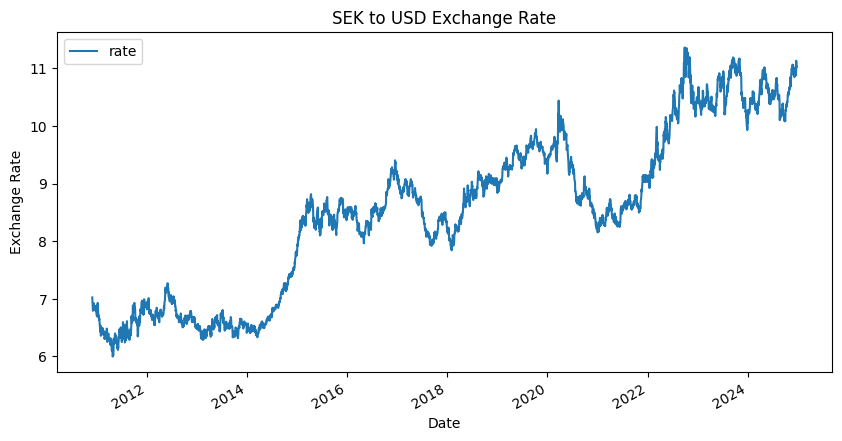

In [ ]:
data.plot(x='date', y='rate', title="SEK to USD Exchange Rate", figsize=(10, 5))
plt.ylabel("Exchange Rate")
plt.xlabel("Date")

In [ ]:
data.shape

(3663, 2)

In [ ]:
sek_to_usd = fs.get_or_create_feature_group(
    name="sek_to_usd",
    version=1,
    description="Historical SEK to USD from 2010-01-01",
    primary_key=["date"],
    event_time="date"
)

sek_to_usd.insert(data)

Uploading Dataframe: 100.00% |██████████| Rows 1/1 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: sek_to_usd_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1167511/jobs/named/sek_to_usd_1_offline_fg_materialization/executions


(Job('sek_to_usd_1_offline_fg_materialization', 'SPARK'), None)